In [6]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from python_files.maxent import MaxEnt
import python_files.densities as d

from scipy.stats import lognorm

In [78]:
#assume mean=0, var=1
def f_SkewKurt(x):
    return np.array([x,x**2,x**3,x**4])

def nth_moment_lognormal(n,mu,s2):
    if(n==1):
        return np.exp(mu+s2/2)
    if(n==2):
        return (np.exp(s2)-1)*np.exp(2*mu+s2)
    if(n==3):
        return (np.exp(s2)+2)*np.sqrt(np.exp(s2)-1) # skewness
    if(n==4):
        ex_s = np.exp(s2)
        return ex_s**4 + 2*ex_s**3 + 3*ex_s**2 - 3 # kurtosis
    
def nth_moment_lognormal_standardized(n,mu,s2):
    if(n==1):
        return 0
    if(n==2):
        return 1
    if(n==3):
        return (np.exp(s2)+2)*np.sqrt(np.exp(s2)-1) # skewness
    if(n==4):
        ex_s = np.exp(s2)
        return ex_s**4 + 2*ex_s**3 + 3*ex_s**2 - 3 # kurtosis


def b_SkewKurt_lognormal(mu, s2):
    return np.array([nth_moment_lognormal(n,mu,s2) for n in range(1,5)])

def b_SkewKurt_lognormal_standardized(mu, s2):
    return np.array([nth_moment_lognormal_standardized(n,mu,s2) for n in range(1,5)])

def pdf_lognorm(x,mu,s2):
    return  lognorm.pdf((x+np.exp(mu+s2/2)),
                         s=s2,
                         loc=0,
                         scale=np.exp(mu)) 

def lambda_actual_lognormal(mu, s2):
    return np.array([-1 + mu/s2, -0.5/s2])


0 21.982183979582828
The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = -151.230
  Lambda_2 = 77.993
  Lambda_3 = -11.659
  Lambda_4 = 0.383


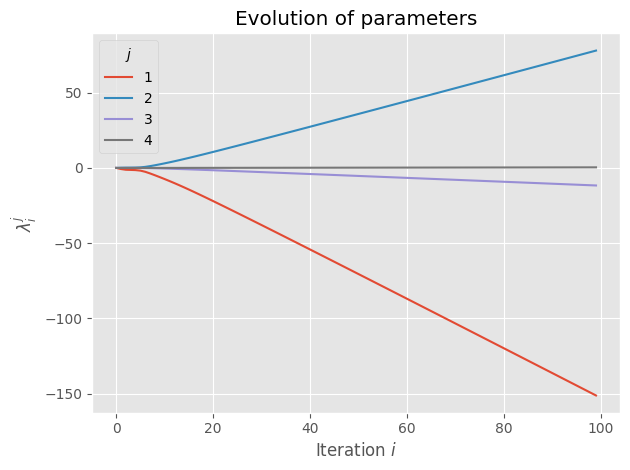

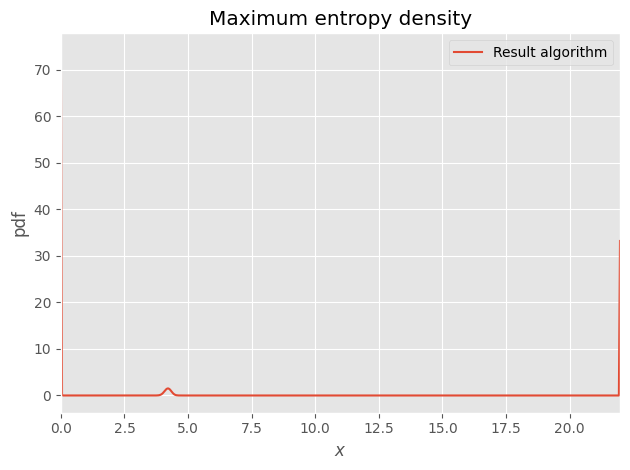

In [ ]:
#Using all moments
mu = 0
s2 = 1

l = 0
u = lognorm.ppf(0.999, s=s2, loc=mu, scale=1)
print(l,u)
n = 360

b = b_SkewKurt_lognormal(mu,s2)

ob_skewkurt = MaxEnt(support=[l,u],
                     n_quadrature=n,
                     b_constraints=b_SkewKurt_lognormal(mu,s2),
                     f_vector=f_SkewKurt)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()

-1.6487212707001282 20.3334627088827
The resulting parameters:
  Lambda_1 = -0.243
  Lambda_2 = -0.657
  Lambda_3 = 0.067
  Lambda_4 = -0.002


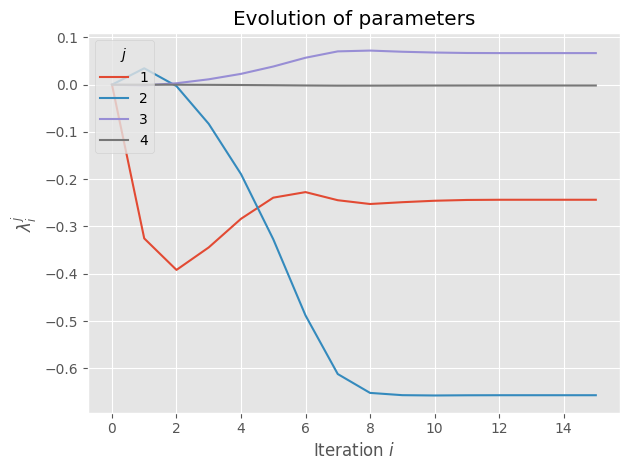

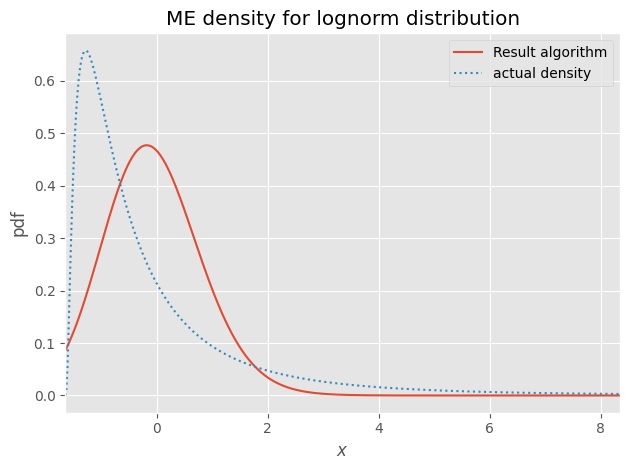

In [95]:
#standardized moments
mu = 0
s2 = 1

l = -np.exp(mu+s2/2)
u = l + lognorm.ppf(0.999, s=s2, loc=mu, scale=1)
print(l,u)
n = 360

ob_skewkurt = MaxEnt(support=[l,u],
                     n_quadrature=n,
                     b_constraints=b_SkewKurt_lognormal_standardized(mu,s2),
                     f_vector=f_SkewKurt)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution(xlim=[l,l+10],
                             actual_density=pdf_lognorm,
                             actual_param=[mu,s2], 
                             title="ME density for lognorm distribution",
                             title_save="figs/viz_sol_example_lognorm.pdf")

-4.0551999668446745 28.151865242914788
The resulting parameters:
  Lambda_1 = -0.277
  Lambda_2 = -0.810
  Lambda_3 = 0.121
  Lambda_4 = -0.005


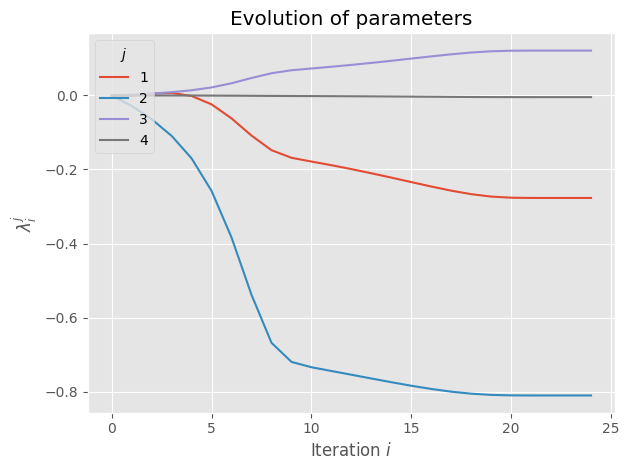

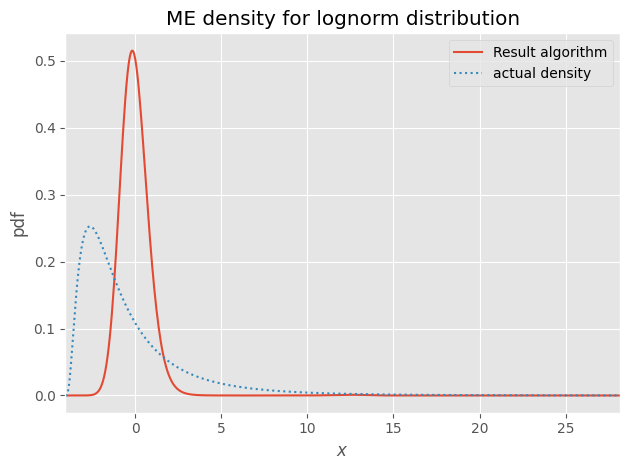

In [94]:
#standardized moments
mu = 1
s2 = .8

l = -np.exp(mu+s2/2)
u = l + lognorm.ppf(0.999, s=s2, loc=0, scale=np.exp(mu))
print(l,u)
n = 360

ob_skewkurt = MaxEnt(support=[l,u],
                     n_quadrature=n,
                     b_constraints=b_SkewKurt_lognormal_standardized(mu,s2),
                     f_vector=f_SkewKurt,
                     k_max=200)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution(
                             actual_density=pdf_lognorm,
                             actual_param=[mu,s2], 
                             title="ME density for lognorm distribution",
                             title_save="figs/viz_sol_example_lognorm.pdf")